## Exercise 1

The data in the `stratflights.csv` (get it from the D2L page, Lecture 3) resulted from a stratified random sampling of flights from different airlines/carriers:

- United Airlines (UA)
- American Airlines (AA)
- Delta Airlines (DL)
- Virgin Airlines (Vx)
- JetBlue Airways (B6)

These data resulted from a random sample of $n=1000$ flights, taken from a population consisting of all domestic flights departing the three NYC-area international airports:

- EWK (Newark International Airport)
- JFK (JFK International Airport)
- LGA (Laguardia International Airport)

Consider the variable `arr_delay`, which measures the number of minutes a flight departing any of the three NYC area airports is late in arriving at its destination. For example, the first record in the data file corresponds to a Delta flight (DL), and the value of `arr_delay` is `-19`, meaning this particular flight arrived at its destintation 19 minutes early.

Over the course of the entire year, there were a total of 32,729 American Airlines flights leaving these three NYC-area airports, or

- $N_{\text{AA}}=32,729$
- $N_{\text{UA}}=58,665$
- $N_{\text{DL}}=48,110$
- $N_{\text{B6}}=56,635$
- $N_{\text{Vx}}=5,162$

1) Produce box-plots to visualize lengths of arrival delays by carrier.

2) How many flights were sampled in each stratum? Do you think that proportional allocation was used in producing this sample?

3) Estimate the mean arrival delay of a flight leaving any of the three NYC-area airports, and its standard deviation.

4) Give a 95% confidence interval for the mean computed in 3).

In [38]:
import pandas as pd
flights = pd.read_csv("stratflights.csv",usecols=["carrier","arr_delay"])
flights


,arr_delay,carrier
0,-28.0,VX
1,-12.0,AA
2,-32.0,UA
3,145.0,UA
4,-28.0,UA
...,...,...
995,-1.0,AA
996,59.0,UA
997,11.0,UA
998,-39.0,AA


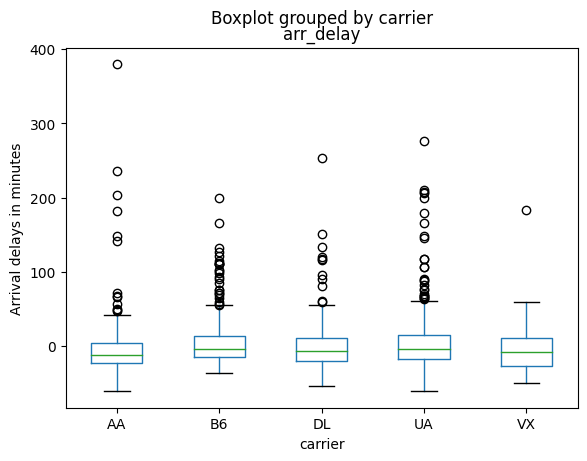

In [160]:
import matplotlib as plt
ax = flights.boxplot(by ='carrier', column =['arr_delay'], grid = False).set_ylabel("Arrival delays in minutes")




In [87]:
# 2) How many flights were sampled in each stratum? Do you think that proportional allocation was used in producing this sample?
# or what is little n for each airline carrier? also, what are the strata? For sure airline

import numpy as np

n = flights.groupby("carrier")["arr_delay"].count()

N = {"AA" : 32729,"UA" : 58665,"DL" : 48110,"B6" : 56635,"VX" :5162}
N = pd.Series(N)

prop = (n / N)*100
prop

# yes it appears propotional allocation of approx .5% was used

AA    0.507195
B6    0.466143
DL    0.467678
UA    0.509674
VX    0.581170
dtype: float64

In [132]:
#3) Estimate the mean arrival delay of a flight leaving any of the three NYC-area airports, and its standard deviation.

flights_strat = flights.groupby("carrier").agg(["count","mean","var"]).arr_delay # note this is drilling into multi level index
mean_strat = flights_strat["mean"] 

# estimate of total arr_delay in pop 
t_hat = sum(N * mean_strat)

# mean estimate using strat sampling
strat_hat = t_hat / sum(N)

# mean estimate using SRS
srs_mean = flights["arr_delay"].mean()

print(f'est mean using strat sampling {strat_hat:.3f} minutes and est mean using SRS {srs_mean:.3f} minutes')
flights_strat



est mean using strat sampling 3.581 minutes and est mean using SRS 3.576 minutes


,count,mean,var
carrier,,,
AA,166,-0.963855,2530.822928
B6,264,6.382576,1299.970950
DL,225,0.151111,1244.941349
UA,299,6.431438,2043.742767
VX,30,1.233333,1931.426437


In [147]:
# standard deviation

# varience of strata
var_strat = flights_strat["var"]

# total variance estimate from strat samples
V_t = sum(N**2*(1 - n/N)*var_strat/n)

# variance of yhat estimate
V_yhat = V_t / sum(N)**2

# or 
var_yhat = sum((1-n/N)*(N/sum(N))**2*(var_strat / n))

# total variance and paremeter variance estimate using SRS
var_srs = flights["arr_delay"].var()
V_tsrs = sum(N**2*(1 - n/N)*var_srs/n)
var_yhat_srs = V_tsrs / sum(N)**2

# variance ratio
variance_ratio = V_t / V_tsrs
variance_ratio

# standard deviation 
se_strat = np.sqrt(V_yhat)
se_srs = np.sqrt(var_yhat_srs)

print(f"se estimate using srs: {se_srs:.2f} vs se estimate using strat sample: {se_strat:.2f}")


se estimate using srs: 1.33 vs se estimate using strat sample: 1.31


In [148]:
# 4) 95% CI using estimated strat mean

upper_bound = V_yhat + 1.96 * se_strat
lower_bound = V_yhat - 1.96 * se_strat
print(f"The confidence interval using a stratified sample is [{lower_bound:.2f},{upper_bound:.2f}]")

upper_bound = V_yhat + 1.96 * se_srs
lower_bound = V_yhat - 1.96 * se_srs
print(f"The confidence interval using a simple random sample is [{lower_bound:.2f},{upper_bound:.2f}]")

The confidence interval using a stratified sample is [-0.85,4.30]
The confidence interval using a simple random sample is [-0.88,4.33]
